In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/apple/Desktop/Data science/Case study/previous_application.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def missval(x):
    total = x.isnull().sum().sort_values(ascending = False)
    percent = (x.isnull().sum()/x.isnull().count()*100).sort_values(ascending = False)
    df_miss=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return(df_miss)

In [4]:
df_missing = missval(df)

In [5]:
df_missing.loc[df_missing['Percent']<40]

,Total,Percent
AMT_GOODS_PRICE,385515,23.081773
AMT_ANNUITY,372235,22.286665
CNT_PAYMENT,372230,22.286366
PRODUCT_COMBINATION,346,0.020716
AMT_CREDIT,1,0.000060
SK_ID_CURR,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
WEEKDAY_APPR_PROCESS_START,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000
FLAG_LAST_APPL_PER_CONTRACT,0,0.000000


In [6]:
df1=df[['PRODUCT_COMBINATION','NAME_CONTRACT_TYPE','NAME_PRODUCT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_YIELD_GROUP','AMT_CREDIT','DAYS_DECISION']]

In [7]:
df1.head(10)

,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE,NAME_PRODUCT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_YIELD_GROUP,AMT_CREDIT,DAYS_DECISION
0,POS mobile with interest,Consumer loans,XNA,XAP,Approved,middle,17145.0,-73
1,Cash X-Sell: low,Cash loans,x-sell,XNA,Approved,low_action,679671.0,-164
2,Cash X-Sell: high,Cash loans,x-sell,XNA,Approved,high,136444.5,-301
3,Cash X-Sell: middle,Cash loans,x-sell,XNA,Approved,middle,470790.0,-512
4,Cash Street: high,Cash loans,walk-in,Repairs,Refused,high,404055.0,-781
5,Cash X-Sell: low,Cash loans,x-sell,Everyday expenses,Approved,low_normal,340573.5,-684
6,Cash,Cash loans,XNA,XNA,Canceled,XNA,0.0,-14
7,Cash,Cash loans,XNA,XNA,Canceled,XNA,0.0,-21
8,Cash,Cash loans,XNA,XNA,Canceled,XNA,0.0,-386
9,Cash,Cash loans,XNA,XNA,Canceled,XNA,0.0,-57


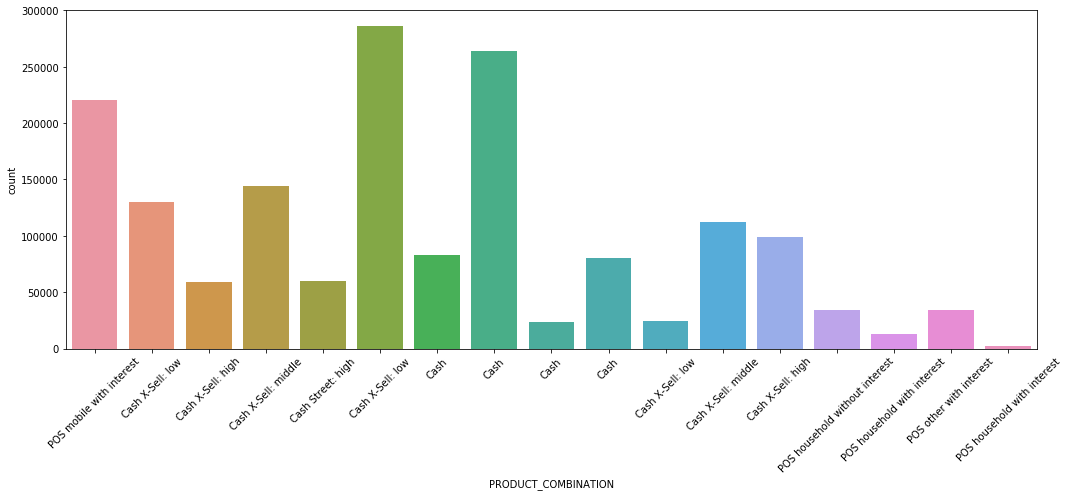

In [8]:
plt.figure(figsize=(15,7))

a=sns.countplot(df1['PRODUCT_COMBINATION'])
a.set_xticklabels(df1['PRODUCT_COMBINATION'], rotation=45, ha="center")
plt.tight_layout()
plt.show()

# Analysis of 'PRODUCT_COMBINATION':

>1. -------

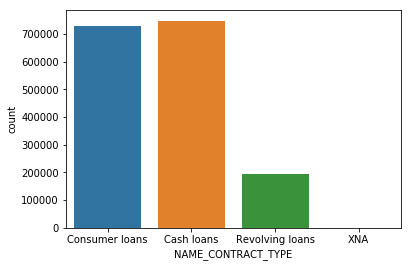

In [9]:
sns.countplot(df1['NAME_CONTRACT_TYPE'])

# Analysis:=====

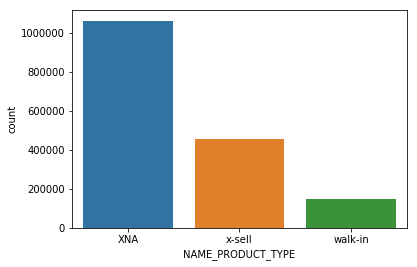

In [10]:
sns.countplot(df1['NAME_PRODUCT_TYPE'])

# Analysis:=======

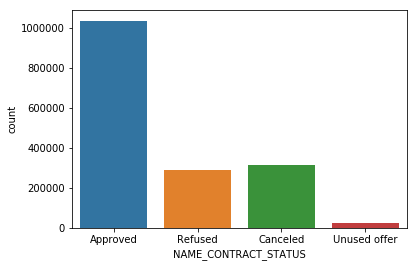

In [11]:
sns.countplot(df1['NAME_CONTRACT_STATUS'])

# Analysis:=====

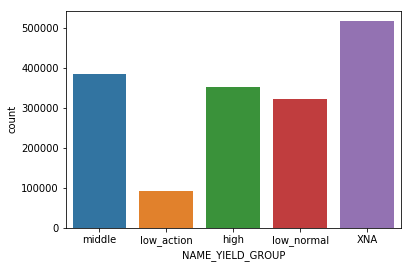

In [12]:
sns.countplot(df1['NAME_YIELD_GROUP'])

# Analysis:====

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


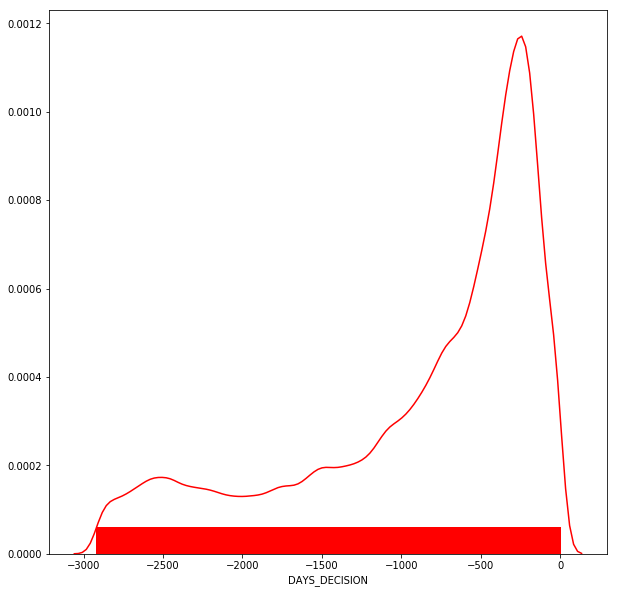

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(df1['DAYS_DECISION'],rug=True,color='r',hist=False)


# Analysis:

In [20]:
df_amt=df1['AMT_CREDIT']
df_amt=df_amt.interpolate(method='pad').astype(int)
df_amt.head(10)


0     17145
1    679671
2    136444
3    470790
4    404055
5    340573
6         0
7         0
8         0
9         0
Name: AMT_CREDIT, dtype: int64

In [21]:
## For name yeild group "XNA" AMT_CREDIT = 0.
## Hence, to plot distplot using "np.log(x)" we get -inf as value which can't be plotted.
## We shall drop the row with "AMT_CREDIT = 0"

df_amtcr=df1.loc[df1['AMT_CREDIT'] != 0]
df_amtcr=df_amtcr['AMT_CREDIT']
df_amtcr=df_amtcr.interpolate(method='pad').astype(int)

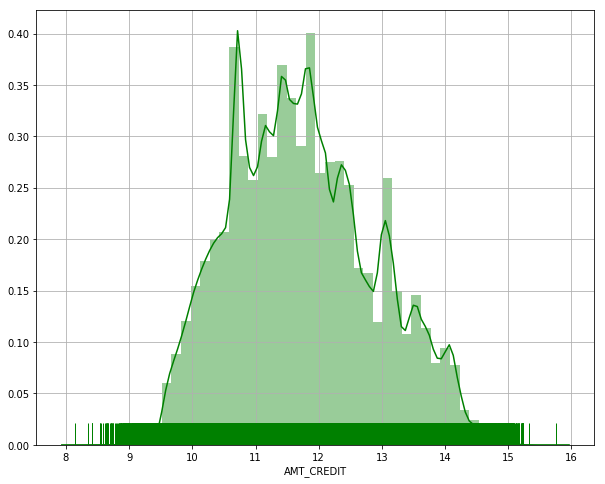

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(df_amtcr),rug=True,color='g').grid()

# Analysis:

In [23]:
df_heat=df1[['AMT_CREDIT','DAYS_DECISION']]

In [24]:
df_heat.head()

,AMT_CREDIT,DAYS_DECISION
0,17145.0,-73
1,679671.0,-164
2,136444.5,-301
3,470790.0,-512
4,404055.0,-781


In [25]:
def days(x):
    if x<0:
        return(x*-1)
    else:
        return(x)
    
def logcon(x):
    if x>0:
        return(np.log(x))
    elif x==0:
        return(1)
    else:
        del(x)
    

In [26]:
df_heat['AMT_CREDIT']=df_heat['AMT_CREDIT'].apply(logcon)
df_heat['DAYS_DECISION']=df_heat['DAYS_DECISION'].apply(days)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
df_heat.head()

,AMT_CREDIT,DAYS_DECISION
0,9.749462,73
1,13.429364,164
2,11.823673,301
3,13.062167,512
4,12.909306,781


In [ ]:
sns.kdeplot(x='AMT_CREDIT',y='DAYS_DECISION', data=df_heat)